# Geospatial Forecasting Analysis for Property Investment

## Author: Jingyi Ran

## Agenda
### 1. Analysis Overview
### 2. Summary Statistics of the Dataset
### 3. Data Preprocessing
####  3.1 Dealing with NaN Values
####  3.2 Dealing with Outliers
####  3.3 Aggregate the data
####  3.4 Other data cleasning work
### 4. Exploratory Data Analysis ( Future Work)
### 5. ARIMA Forecasting Model
### 6. Model Evaluation
### 7. Business Suggestion

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

/Users/jingyiran/opt/anaconda3/envs/yiyi/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jingyiran/opt/anaconda3/envs/yiyi/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## 1. Analysis Overview

For this case study, we will analyze the demographic data categorized by zip codes to target the best areas for property investment. Specifically, we are going to predict the top 10 zip codes for property investment. 

The approach applies the ARIMA time series forecasting model to forecast the Median Home Value in the next 10 years of each zip code and further calculate the compound annual growth rate (CAGR) in the next ten years. We will pick the top 10 zip codes with the highest CAGR. One important assumption is that we don't consider the impact of pandemic and other issues like financial crisis

In addition, we are interested in how geographically close zip codes impact each other. We choose to use Tableau to create map visualization to get insights. 

Link to visualization: 
https://jingyi106.github.io/Property_Investment_Data_CaseStudy/Visualization.html

## 2. Summary Statistics of the Dataset

In [2]:
data=pd.read_csv('data_x.csv')

In [3]:
data.head()

,id,Tract_number,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
0,1,1001020100,36067.0,2012,Alabama,195.0,2,1764,121500.0,1812,...,203,357,724,289,242,98,105,55,27,0
1,2,1001020200,36067.0,2012,Alabama,222.0,2,2074,130500.0,2218,...,722,311,893,180,367,144,220,79,49,0
2,3,1001020300,36067.0,2012,Alabama,261.0,2,3103,118700.0,3155,...,643,551,1361,334,450,310,217,183,51,29
3,4,1001020400,36067.0,2012,Alabama,764.0,2,4329,133500.0,4337,...,915,848,1851,547,596,250,325,192,159,38
4,5,1001020500,36066.0,2012,Alabama,540.0,2,10431,174500.0,10498,...,3499,1815,4114,1409,2304,859,1036,499,323,57


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511392 entries, 0 to 511391
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   id                                                        511392 non-null  int64  
 1   Tract_number                                              511392 non-null  int64  
 2   zip_code                                                  508357 non-null  float64
 3   Year                                                      511392 non-null  int64  
 4   state                                                     511392 non-null  object 
 5   Unweighted Sample Count of the population                 510464 non-null  float64
 6   Avg household size of occupied housing units              511392 non-null  int64  
 7   Total population in occupied housing units                511392 non-null  int64  
 8   Medi

In [5]:
data.describe()

,id,Tract_number,zip_code,Year,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,Median Gross rent as % of household inc,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
count,511392.000000,5.113920e+05,508357.000000,511392.000000,510464.000000,511392.000000,511392.000000,5.110470e+05,511392.000000,511392.000000,...,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000
mean,245259.928571,2.782602e+10,50689.436068,2014.857143,355.655135,2.129124,4214.901758,2.252238e+05,4325.183785,30.206405,...,1413.807561,669.422537,1827.629609,473.524826,721.872456,352.438462,448.481026,186.095887,130.312785,41.973993
std,133687.409974,1.581001e+10,29262.662964,1.807018,187.964759,0.591227,2122.779132,1.970134e+05,2130.207678,9.164117,...,1135.065639,473.430636,866.268775,286.956461,570.382097,221.873957,280.688857,149.297336,124.953420,51.307240
min,1.000000,1.001020e+09,1001.000000,2012.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,127848.750000,1.212708e+10,27530.000000,2013.000000,254.000000,2.000000,2798.000000,1.030000e+05,2891.000000,25.000000,...,607.000000,339.000000,1256.000000,274.000000,327.000000,200.000000,257.000000,89.000000,49.000000,10.000000
50%,255696.500000,2.712304e+10,48104.000000,2015.000000,321.000000,2.000000,3959.000000,1.644000e+05,4062.000000,29.000000,...,1124.000000,591.000000,1722.000000,426.000000,580.000000,311.000000,399.000000,152.000000,97.000000,27.000000
75%,374412.250000,4.103597e+10,77428.000000,2017.000000,406.000000,2.000000,5318.000000,2.810000e+05,5436.000000,35.000000,...,1915.000000,905.000000,2283.000000,617.000000,973.000000,456.000000,582.000000,242.000000,175.000000,57.000000
max,438336.000000,5.604595e+10,99928.000000,2017.000000,6289.000000,14.000000,65345.000000,2.000001e+06,65528.000000,50.000000,...,22309.000000,12672.000000,26526.000000,6131.000000,18936.000000,4007.000000,9073.000000,5123.000000,2947.000000,1142.000000


From the summary statistics results, we found there are approximately 511392 rows and the datasets contains some NaN values and outliers. In addition, since our goal is to forecast the median home value of each zip code in next 10 years, we only need some relevant variables. 

## 3. Data Preprocessing

In [6]:
# Select relevant columns: Zip_code, Year, Median Estimated Home Value
data_arima=data[['zip_code','Year','Median Estimated Home Value(owner occupied units)']]
data_arima=data_arima.rename(columns={'Median Estimated Home Value(owner occupied units)':'Median Home Value'})

In [7]:
data_arima

,zip_code,Year,Median Home Value
0,36067.0,2012,121500.0
1,36067.0,2012,130500.0
2,36067.0,2012,118700.0
3,36067.0,2012,133500.0
4,36066.0,2012,174500.0
...,...,...,...
511387,82414.0,2017,222100.0
511388,82414.0,2017,228100.0
511389,82450.0,2017,314900.0
511390,82941.0,2017,282400.0


### 3.1 Preprocessing: deal with NaN Values

Firstly check the percentage of NaN values in each column, and then choose the most proper method to deal with NaN values for each column. 
For “zip_code” column, since we cannot do any analysis without zip code information, we choose to delete rows with missing zip codes
For “Median Home Value”column, we choose to impute the NaN values with median values at the same zip code and in the same year. 

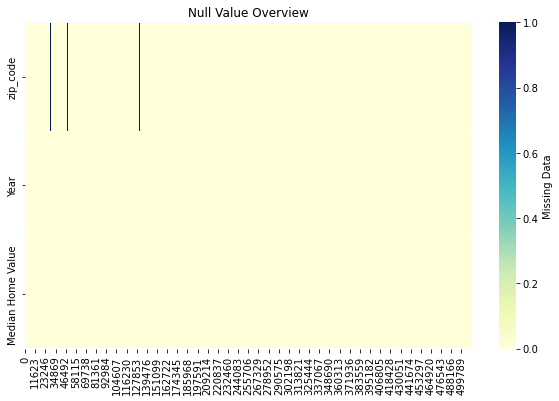

In [8]:
# Check the distribution of the NaN values
plt.figure(figsize=(10,6))
plt.title('Null Value Overview')
sns.heatmap(data_arima.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [9]:
# More precisely, check the count of missing values in each column
data_arima.isnull().sum()

zip_code             3035
Year                    0
Median Home Value     345
dtype: int64

#### Drop the rows where zip_code is  missing

In [9]:
data_arima.dropna(subset='zip_code',inplace=True)

In [10]:
# Check if all "missin zip_code" are removed
data_arima.isna().sum()

zip_code               0
Year                   0
Median Home Value    344
dtype: int64

#### Impute the missing Home Values using median home value of each zipcode at each year

In [11]:
data_arima['Median Home Value'].fillna(data_arima.groupby(["zip_code","Year"])['Median Home Value'].
                                 transform('median'),inplace=True)

In [12]:
# Check if all "missing Home Values" are removed
data_arima.isna().sum()

zip_code              0
Year                  0
Median Home Value    38
dtype: int64

Interesting! After the imputation, we found there are still some NaN values in the Home Value column, one possible reason is that some zip_codes only appear once so we cannot use the median value to impute the missing value. Since it's only a small proportion (38 out of more than 500 thousand), just delete rows with NaN values

In [13]:
data_arima.dropna(subset='Median Home Value',inplace=True)

In [14]:
# Check if all "missing Home Values" are removed
data_arima.isna().sum()

zip_code             0
Year                 0
Median Home Value    0
dtype: int64

### 3.2 Preprocessing: Deal with outliers 

In [15]:
#  Check the shape of dataset after dealing with NaN values
data_arima[data_arima['Median Home Value']==0].shape

(9628, 3)

In [16]:
# Median Home Value cannot be 0, so delete rows whose median home value is 0
data_arima=data_arima[data_arima['Median Home Value']!=0]

#### Future work in this part:
Becuase of time limit, we only consider the case of "zero median home values". For future work, we need to do more work in identifying and dealing with outliers becuase outliers have non-negligible negative impact on the predicting results. Common approaches include visualize data using histgrams and box plots and then dealing with highly skewed distribution, and excluding values outside 3 standard deviation from the mean. 

### 3.3 Preprocessing: Aggregate the data

#### Purpose:
We found there are multiple rows for the same zipcode at the same year, which is pretty strange. Since our goal is to forecast the median home value of each zipcode, we need to aggregate the data. The outcome of aggregating data is one record for each zipcode at each year

In [17]:
# Convert zip_code from float to int
data_arima['zip_code']=data_arima['zip_code'].astype(int)
# Convert the datatype of 'Year' colummn from string to datetime (for time series forecasting purpose)
data_arima['Year']=pd.to_datetime(data_arima['Year'],format = "%Y")

/var/folders/vg/pr1vdfbs7xj4xh3qmndt97m40000gn/T/ipykernel_26149/2831497679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arima['zip_code']=data_arima['zip_code'].astype(int)
/var/folders/vg/pr1vdfbs7xj4xh3qmndt97m40000gn/T/ipykernel_26149/2831497679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arima['Year']=pd.to_datetime(data_arima['Year'],format = "%Y")


In [18]:
data_arima_agg=pd.DataFrame(data_arima.groupby(['zip_code','Year'])['Median Home Value'].median())

In [19]:
data_arima_agg

Median Home Value
zip_code Year                         
1001     2012-01-01           227900.0
         2013-01-01           227150.0
         2014-01-01           226850.0
         2015-01-01           222800.0
         2016-01-01           222500.0
...                                ...
99928    2013-01-01           309900.0
         2014-01-01           298600.0
         2015-01-01           288400.0
         2016-01-01           296500.0
         2017-01-01           296600.0

[130629 rows x 1 columns]

###  3.4 Preprocessing: Other Data Cleasening Work

#### Exclude zipcodes with missing years
In the preprocessing , we found that for some zip codes, there are only one or two years records, in this case, it's hard to do forecasting becuase of not enough datapoints. So, we are going to check how many zipcodes have less than 6 years' data (2012-2017), if it's just a small proportion (less than 1%), delete those data

In [20]:
sum(data_arima_agg.groupby('zip_code').size()!=6)

102

In [21]:
data_arima_agg.groupby('zip_code').ngroups

21816

Only 102 out of 21816 zipcodes don't have entire records, so just exclude those zipcodes

In [22]:
zip_all_years=data_arima_agg.groupby('zip_code').size()==6
zip_all_years=list(zip_all_years.where(zip_all_years==True).dropna().index)
data_arima_agg_all_years=data_arima_agg.loc[zip_all_years]

It's time to check the finalized dataframe for the forecasting model! 

21714 zipcodes will be the candidates for the top 10 "Most Potential Areas".

In [23]:
data_arima_agg_all_years.groupby('zip_code').ngroups

21714

In [24]:
data_arima_agg_all_years

Median Home Value
zip_code Year                         
1001     2012-01-01           227900.0
         2013-01-01           227150.0
         2014-01-01           226850.0
         2015-01-01           222800.0
         2016-01-01           222500.0
...                                ...
99928    2013-01-01           309900.0
         2014-01-01           298600.0
         2015-01-01           288400.0
         2016-01-01           296500.0
         2017-01-01           296600.0

[130284 rows x 1 columns]

## 4. Exploratory Data Analysis (Future Work)


Usually, before modeling, we will do some exploratory data analysis to know the data better. But because of the time limit and considering the EDA doesn't help a lot for building the forecasting model especially we have decided to use ARIMA and we have a clear goal for model building, we choose to make it "Future Work".

Lots of analysis can be done in the EDA part. For example, we can have map visualization to see in which states or in which regions, the properties have relatively higher value and higher rent prices. In addition, it's also interesting to pick some regions (eg: New York and California) and visualize the trend of housing prices from 2012 to 2017. Also, age is another factor that we could explore, maybe we can make sorted bar plots to compare the age of the population in different regions, from which we can combine the characteristics of different age groups and the property information to find investment opportunities. 

##  5. ARIMA Time Series Forecasting

We choose to apply the ARIMA time series forecasting algorithm to forecast the median home value of each zip code in the next 10 years starting from 2018 and further calculate the compound annual growth rate (CAGR)

Each zip code has one time series. For a specific zip code, we use the median estimated home value from 2012 to 2017 (6 data points) to predict the median estimated home value from 2018 to 2027 (10 data points). The logic of ARIMA in this scenario is using data from 2012 to 2017 to predict the value in 2018 and using data from 2013 to 2018 to predict the value in 2017, etc. (Autoregressive Integrated Moving Average principle)

Finally, we have 21912 time series because we have 21912 different zip codes after data cleansing. 

After generating the forecasting median home values for the next 10 years, we calculate the CAGR in the next ten years of each zip code and get the top 10 zip codes with the highest CAGR. 

In [31]:
# List "CAGR_result" to store the CAGR in next 10 years of each zip code
CAGR_result=[]
# List "error" to store the mean abolute error of each time series
error=[]
for zipcode, new_df in data_arima_agg_all_years.groupby(level=0):
    new_df=new_df.reset_index().drop('zip_code',axis=1).set_index('Year')
    series=new_df.squeeze()
    series=series.asfreq('YS')
    model = ARIMA(series,order=(1,1,0)).fit()
    forecast_next_10_years=model.get_forecast(steps=10).predicted_mean
    CAGR=(forecast_next_10_years[9]/forecast_next_10_years[0])**(1/10)-1
    CAGR_result.append((zipcode,CAGR))
        
    y_pred=model.get_prediction(-6).predicted_mean
    y_true=series.values
    mae=mean_absolute_error(y_true, y_pred)
    error.append(mae)
    

#  Calculate the average value of mean absolute error
mean_absotue_error=np.mean(error)

It's time to generate top 10 zip codes! 

In [27]:
result_df=pd.DataFrame(CAGR_result,columns=['zip_code','CAGR']).sort_values(by='CAGR',ascending=False)
top10_zipcode=result_df.head(10)['zip_code']

In [28]:
result_df.head(10)

,zip_code,CAGR
16754,75751,0.088055
17078,77003,0.020708
17035,76701,0.016622
17223,77358,0.011768
15324,68874,0.011061
19764,92115,0.008544
7160,32772,0.006182
17875,79605,0.005878
15472,70375,0.005836
13293,58830,0.004424


In [29]:
data.loc[data['zip_code'].isin(list(top10_zipcode))][['zip_code','state']].drop_duplicates().reset_index(drop=True)

,zip_code,state
0,92115.0,California
1,32772.0,Florida
2,70375.0,Louisiana
3,68874.0,Nebraska
4,58830.0,North Dakota
5,75751.0,Texas
6,77003.0,Texas
7,76701.0,Texas
8,77358.0,Texas
9,79605.0,Texas


Our Champion is 75751. We predict its Median Home Value in next 10 years have 8.8% compound annual growth rate (CAGR). 

## 6. Model Evaluation

### Evaluation Metric: Mean Absolute Error
Since time series forecasting is a special type of regression problem, we need to choose metrics for evaluating the regression model, so I choose Mean Absolute Error

For this model, the average of the mean absolute error of all time series is 8783, since the average of the 'Median Home Value" column is 230886, and 8783 is much smaller than the mean value of the target variable, so we can assume the model has a great performance. 

### Future Work
Firstly, we need to tune the hyperparameters of the ARIMA model. In this case study, I just use the default parameters to do the forecasting, which is risky. 

In addition, the model training and model evaluation should be an iterative process. 



## 7. Business Suggestions

The top 10 zip codes to target is shown below:

In [30]:
data.loc[data['zip_code'].isin(list(top10_zipcode))][['zip_code','state']].drop_duplicates().reset_index(drop=True)

,zip_code,state
0,92115.0,California
1,32772.0,Florida
2,70375.0,Louisiana
3,68874.0,Nebraska
4,58830.0,North Dakota
5,75751.0,Texas
6,77003.0,Texas
7,76701.0,Texas
8,77358.0,Texas
9,79605.0,Texas


In addition, we can see among those 10 zip codes, 5 zip codes are in Texas. Maybe Texas is one of the best states to invest in properties

## Not the end!

In addition to the top 10 zip codes, we are also interested in how geographically close zip codes impact each other.

Since we found Texas might be one of the best states to invest in properties, we created some visualizations in Tableau to see if there are any clusters to show the similarities.

Link to the visualization: https://jingyi106.github.io/Property_Investment_Data_CaseStudy/Visualization.html